In [30]:
#!pip install xgboost
#!pip install imblearn
#!pip install lightgbm
#!pip install --upgrade threadpoolctl
#!pip install --upgrade imbalanced-learn
#!pip install -U scikit-learn
#!pip install --upgrade scikit-learn
#!pip install transformers
#!pip install pytorch
#!pip install tf-keras

  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)


In [3]:
# # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import nltk

# necessary imports  for text preprocessing
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
import unicodedata

# For spliting data sets  and evalution reports imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from collections import Counter

# for text representation using feature engginering 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Different Classifier imports 
# from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# transformer classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from transformers import BertTokenizer, BertModel
from transformers import TFBertForSequenceClassification
from transformers import RobertaTokenizer, RobertaModel
from transformers import TFRobertaForSequenceClassification


from string import punctuation
from nltk import pos_tag
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings





In [4]:
# fetching  the dataset and labels 
emotion_df = pd.read_csv(r"C:\Users\siban\Text Ananlysis\Emotions_training.csv",encoding='latin-1')
emotion_labels = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

Data Overview and Related task 

In [5]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [6]:
emotion_df['label'].unique() 

array([0, 3, 2, 5, 4, 1], dtype=int64)

In [7]:
emotion_df.isnull().sum()

text     0
label    0
dtype: int64

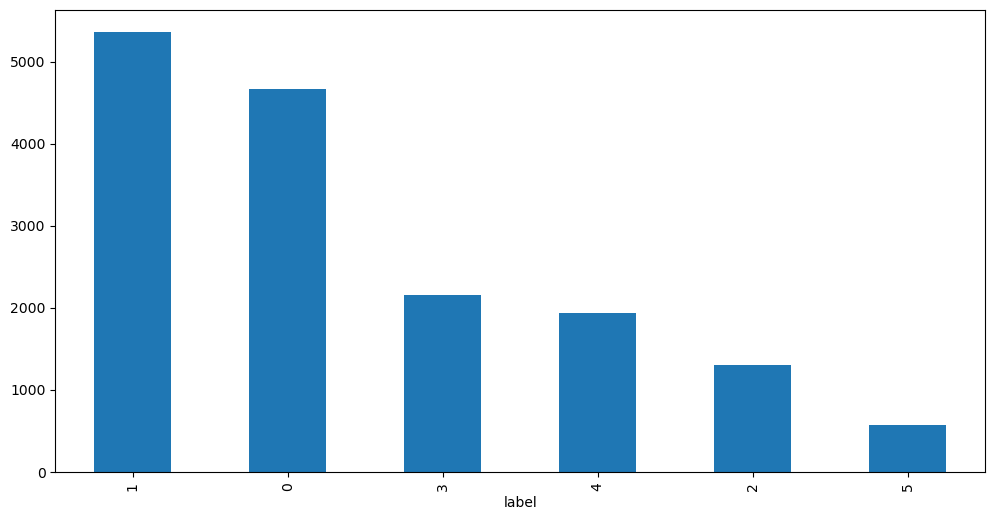

In [8]:
plt.figure(figsize=(12,6))
emotion_df.label.value_counts().plot(kind='bar');

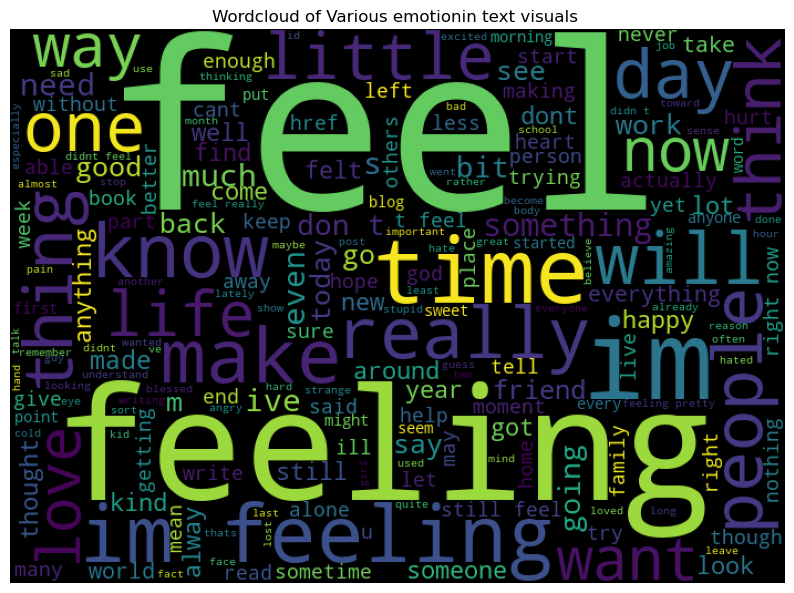

In [9]:
## Data preprocessing on text
wordcloud = WordCloud(width=700, height=500, background_color="black")

wordcloud.generate(" ".join(emotion_df['text']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of Various emotionin text visuals ")
plt.show()


Text preprocessing of text column of Emotions data set 


In [10]:
# converting to lower case 
emotion_df['text']=emotion_df['text'].str.lower() 
# Using stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove("not") 
stop_words=set(stop_words)

Cleaning of text usning pipeline with functions to clean the textual data


In [11]:
# Removal existing html tags
def remove_html_tags(text): 
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

# Removal punctuations
def remove_special_character(content): 
    return re.sub(r'[^a-zA-Z ]',' ', content )

#Removal of URLs
def remove_url(content): 
    return re.sub(r'http\S+', '', content)

# Remove of stop words from content part of text column 
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [12]:
# For the expansions of  some certain contract usage in text column 
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

Data Cleaning workplace to cleane the data

In [13]:
def data_cleaning(content):
    if not pd.isna(content):  
        content = remove_html_tags(content)
        content = remove_url(content)
        content = remove_special_character(content)
        content = contraction_expansion(content)
        content = remove_stopwords(content)
    return content

In [14]:
emotion_df['text']=emotion_df['text'].apply(data_cleaning)

In [15]:
# using Lemmatization on cleaned data 
# Lemmatization from nltk package
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
emotion_df['text'] = emotion_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [16]:
# checking after implementing lemmatization 
emotion_df['text'][700]

'think feel passionate favorite workout gear love seeing people love need live without hoping share favorite comment'

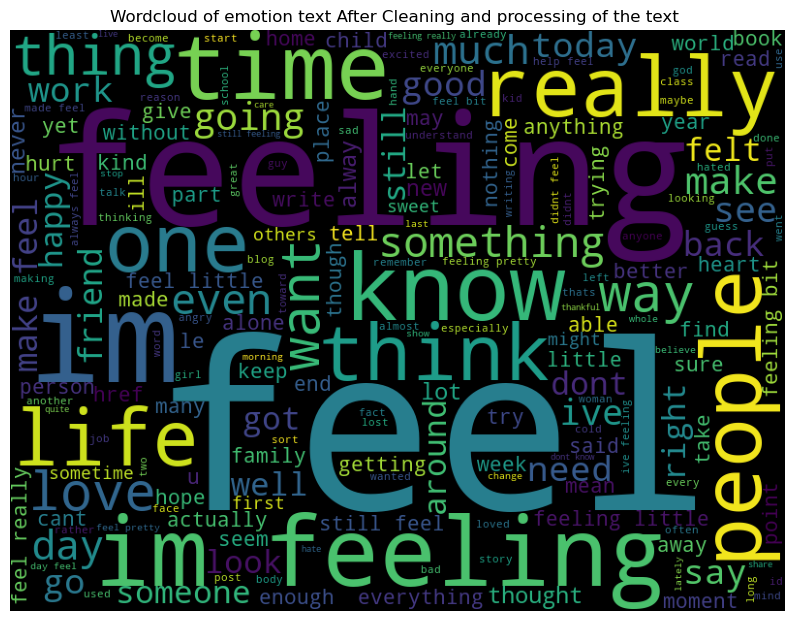

In [17]:
#visualization of content through world cloud 
wordcloud = WordCloud(width=800, height=600, background_color="black")
wordcloud.generate(" ".join(emotion_df['text']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of emotion text After Cleaning and processing of the text ")
plt.show()


Dataset After performing Text preprocessing

In [18]:
emotion_df

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting table subb...,0
15997,feel strong good overall,1
15998,feel like rude comment im glad,3


Taking the  multi class immbalance of the dataset 

In [19]:
class_counts = emotion_df['label'].value_counts()
majority_class = class_counts.idxmax()  

# Function for oversample a class
def oversample_class(data_subset, target_count):
    oversampled_data = data_subset.sample(replace=True, n=target_count - len(data_subset))
    return pd.concat([data_subset, oversampled_data])

# Oversample minority classes
oversampled_data = []
for label, count in class_counts.items():
    if label != majority_class: 
        data_subset = emotion_df[emotion_df['label'] == label]  
        oversampled_subset = oversample_class(data_subset, class_counts[majority_class])  
        oversampled_data.append(oversampled_subset)
    else:
        oversampled_data.append(emotion_df[emotion_df['label'] == label])  
# Combine the oversampled data
oversampled_df = pd.concat(oversampled_data)

# Extracting text and labels from oversampled data
oversampled_text = oversampled_df['text']
oversampled_labels = oversampled_df['label']



<Axes: xlabel='label'>

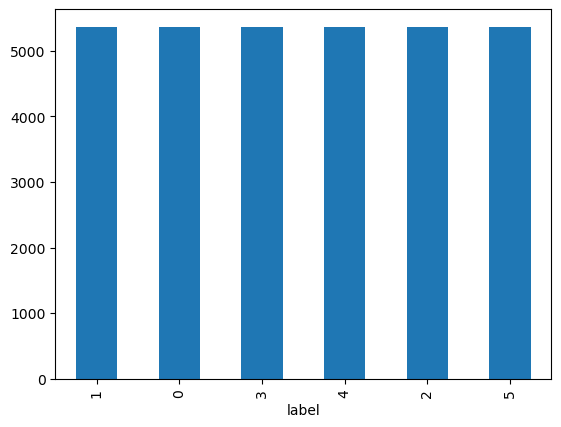

In [20]:
#visualization of the oversampled data by bar chart
oversampled_labels.value_counts().plot(kind="bar")

Feature Engginearing and partion of traning and testing data and valaidation data 


In [21]:
# Division of data sets 
y = emotion_df['label']  
X  = emotion_df['text']

# text Represntation by using Vectorization suggested by the mentor 
vectorizer = TfidfVectorizer(max_features=2000)  
features_oversampled = vectorizer.fit_transform(oversampled_text)

vectorizer = TfidfVectorizer(max_features=2000)  
X_imb_vec = vectorizer.fit_transform(X)

In [22]:
# Split the dataset into train, test, and validation sets 

In [23]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb_vec, y, test_size=0.3, random_state=42,stratify=y)

In [24]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [25]:
# Handling imbalance by using the SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_im, y_im = smote.fit_resample(X_imb_vec, y)
num_classes = len(set(y_im))

In [26]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_im, y_im, test_size=0.3, random_state=42,stratify=y_im)

Modeling 


In [27]:

classifiers_for_imb = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='multi:softprob', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(objective='multiclass', num_class=num_classes, random_state=42),
}
    #'BERT': TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes),
    #'RoBERTa': TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_classes)






In [28]:
param_grid_for_imb = {
    'DecisionTree': {'max_depth': [3, 5, 8, 10, 20, 30]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf', 'linear']},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'LightGBM': {'learning_rate': [0.01, 0.1, 1]},
    #'BERT': {'learning_rate': [5e-5, 3e-5, 2e-5], 'epsilon': [1e-8, 1e-7, 1e-6]},
    #'RoBERTa': {'learning_rate': [5e-5, 3e-5, 2e-5], 'epsilon': [1e-8, 1e-7, 1e-6]}
}

In [ ]:
scores_imb = []  # holds the each scoring of classifier at iterations
best_estimators_imb = {}  # set of all the best selected classifiers with best param

for model_name, model in classifiers_for_imb.items():
    clf = GridSearchCV(model, param_grid_for_imb[model_name], scoring='accuracy', cv=5)
    clf.fit(X_train_imb, y_train_imb)  # Use vectorized features
    scores_imb.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators_imb[model_name] = clf.best_estimator_

In [ ]:
output_df_imb=pd.DataFrame(scores_imb,columns=['model','best_score','best_params'])
output_df_imb.sort_values(by="best_score",ascending=False)